# NEST Cerebellar Models



In [2]:
from src import simulation
from src import analysis
from src import visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## Base LIF Network

Setting up the simulation initializes neuron populations and creates synaptic connections based on predefined probabilities. The simulation is thus executed for the duration specified in `config.py`, namely `SIM_TIME`. Recorder spike and voltage data is returned for further analysis.

In [3]:
results = simulation.example_simulation()
# Waiting time: ~ 1:20 min

Created 2500 granule cells.
Created 64 Purkinje cells.
Created 150 interneurons.
Created 30 Golgi cells.
Created 20 deep cerebellar nuclei cells.
Created 1500 mossy fibers.
Created 64 climbing fibers.
Number of mossy -> granule connections: 187731
Number of mossy -> golgi connections: 9012
Number of mossy -> DCN connections: 30000
Number of granule -> golgi connections: 766
Number of granule -> purkinje connections: 144032
Number of granule -> interneuron connections: 112411
Number of golgi -> granule connections: 7550
Number of golgi -> golgi connections: 191
Number of climbing -> purkinje connections: 64
Number of interneuron -> purkinje connections: 1938
Number of interneuron -> interneuron connections: 9051
Number of purkinje -> DCN connections: 320
Network setup complete.
Simulation running...
Simulation complete.


Results analysis consists in extracting spike and voltage data from the simulation results for different neuron populations. Spike train analysis provides firing rates and burst detection, and firing regularities and patterns are identified through ISI distributions.

In [4]:
## Analyze results

# To make the analysis faster, we can skip the correlation analysis (~ 1hr)
skip_correlations = False

PC_spike_data = results["purkinje_spikes"]
PC_voltage_data = results["purkinje_voltages"]
GrC_spike_data = results["granule_spikes"]
GrC_voltage_data = results["granule_voltages"]
GoC_spike_data = results["golgi_spikes"]
GoC_voltage_data = results["golgi_voltages"]

PC_spike_results = analysis.analyze_spike_data(PC_spike_data, skip_correlations=skip_correlations)
GrC_spike_results = analysis.analyze_spike_data(GrC_spike_data, skip_correlations=skip_correlations)
GoC_spike_results = analysis.analyze_spike_data(GoC_spike_data, skip_correlations=skip_correlations)

PC_isis = analysis.get_isi_distribution(PC_spike_results["spike_trains"])
GrC_isis = analysis.get_isi_distribution(GrC_spike_results["spike_trains"])
GoC_isis = analysis.get_isi_distribution(GoC_spike_results["spike_trains"])

Starting spike data analysis with 2954 spikes from 64 neurons.
Created 64 spike trains.
Firing rates calculated - average: 46.19 Hz
ISI CV calculated - 64 valid values, average: 0.00
Calculating spike correlations for 64 neurons...


100%|██████████| 64/64 [00:00<00:00, 112.32it/s]


Average spike correlation: 0.54
Starting spike data analysis with 173166 spikes from 2500 neurons.
Created 2500 spike trains.
Firing rates calculated - average: 69.27 Hz
ISI CV calculated - 2500 valid values, average: 0.08
Calculating spike correlations for 2500 neurons...


100%|██████████| 2500/2500 [16:03<00:00,  2.59it/s]


Average spike correlation: 0.06
Starting spike data analysis with 5772 spikes from 30 neurons.
Created 30 spike trains.
Firing rates calculated - average: 192.42 Hz
ISI CV calculated - 30 valid values, average: 0.02
Calculating spike correlations for 30 neurons...


100%|██████████| 30/30 [00:00<00:00, 151.70it/s]


Average spike correlation: 1.00


**Raster plots** visualize spike times for each neuron in the population, showing overall firing activity, while **ISI (Interspike Interval) histograms** display the distribution of time intervals between consecutive spikes, helping analyze firing regularity and burst patterns. We display both for Purkinje, Granule and Golgi cells.

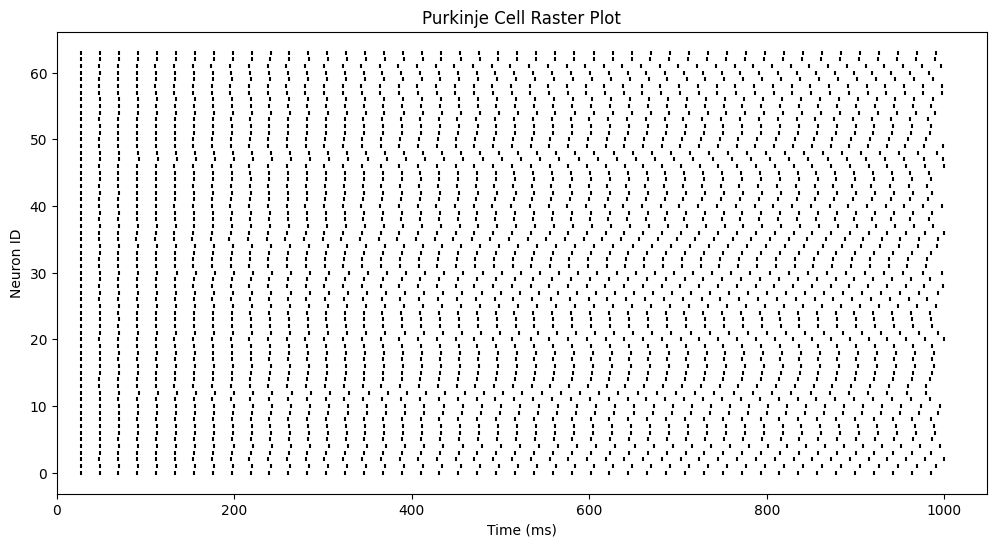

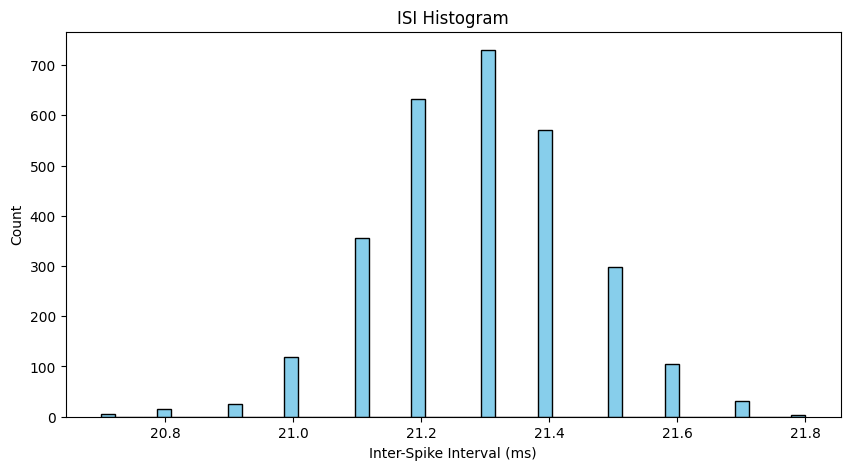

In [5]:
visualization.plot_raster(PC_spike_results, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_isis)

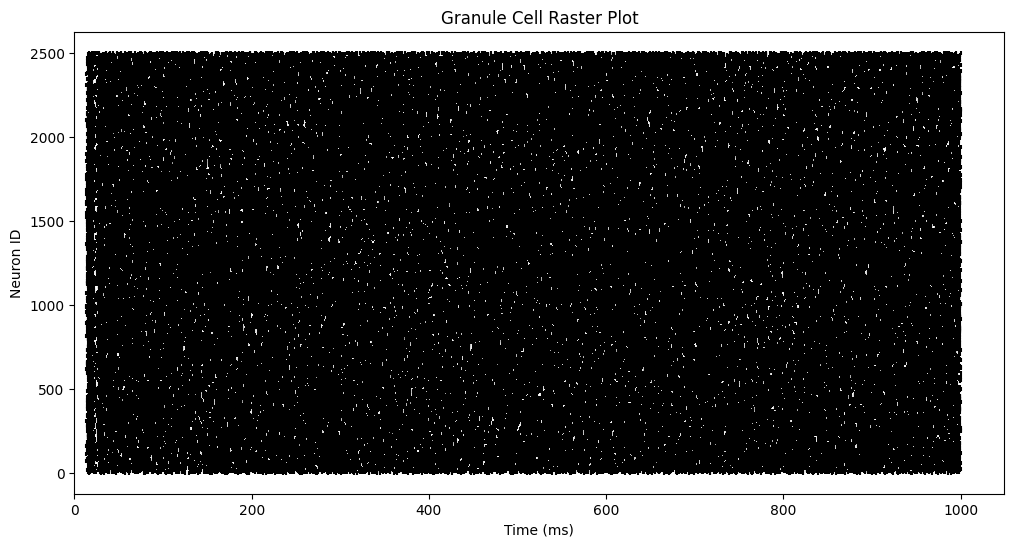

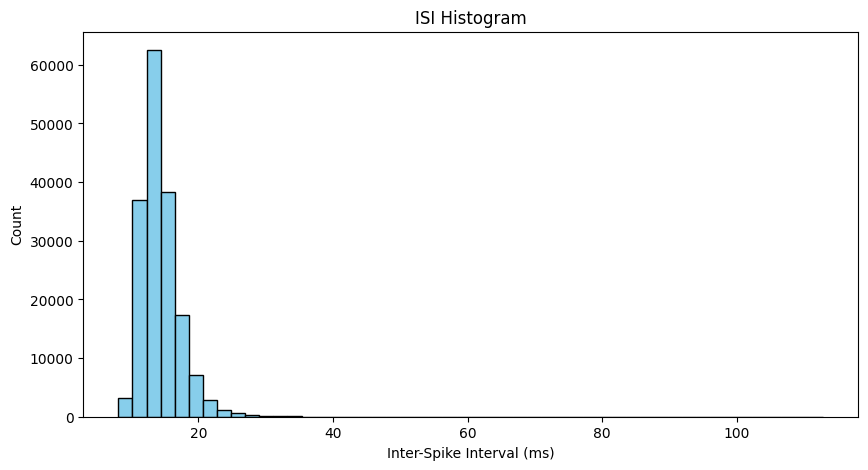

In [6]:
visualization.plot_raster(GrC_spike_results, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_isis)

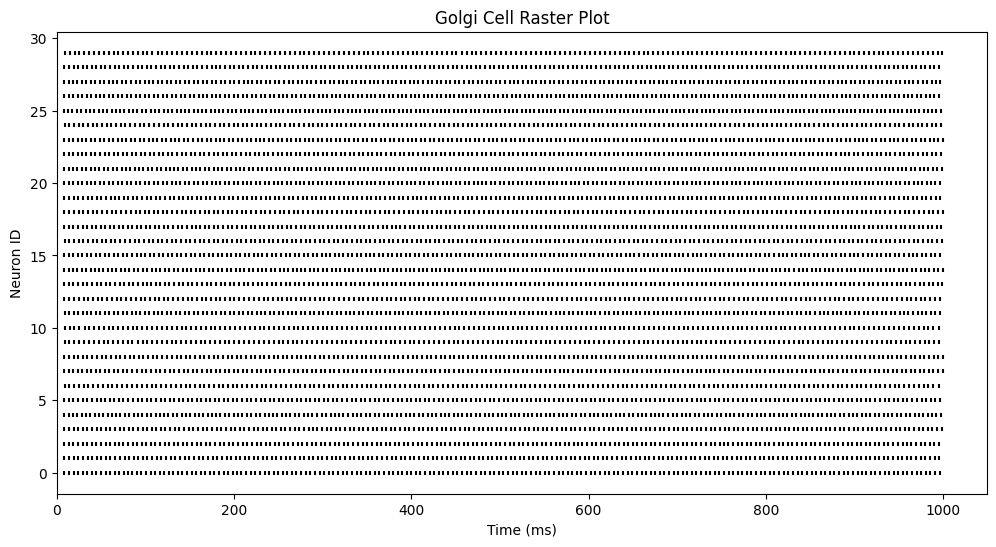

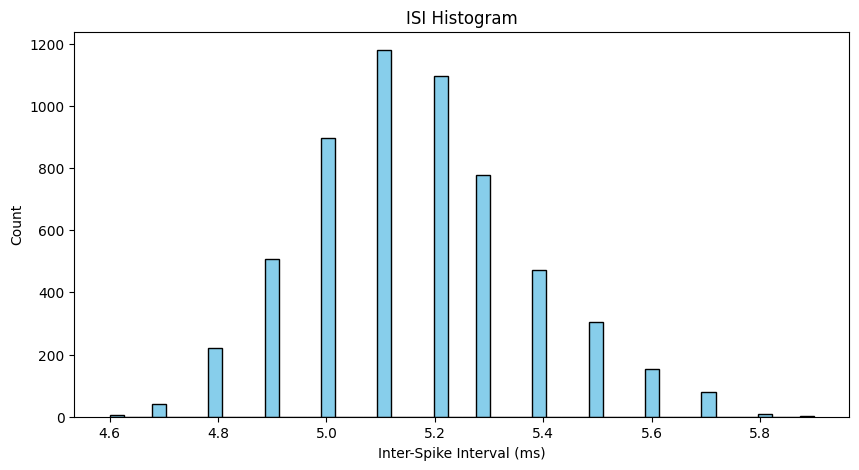

In [7]:
visualization.plot_raster(GoC_spike_results, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_isis)

**Voltage traces** are also shown for Purkinje, Granule and Golgi populations, displaying how the membrane potential of neurons evolves over time. These plots help analyze neuronal excitability, subthreshold fluctuations, and spike occurrences.

Visualization of Voltage Traces of the 3 selected Populations:



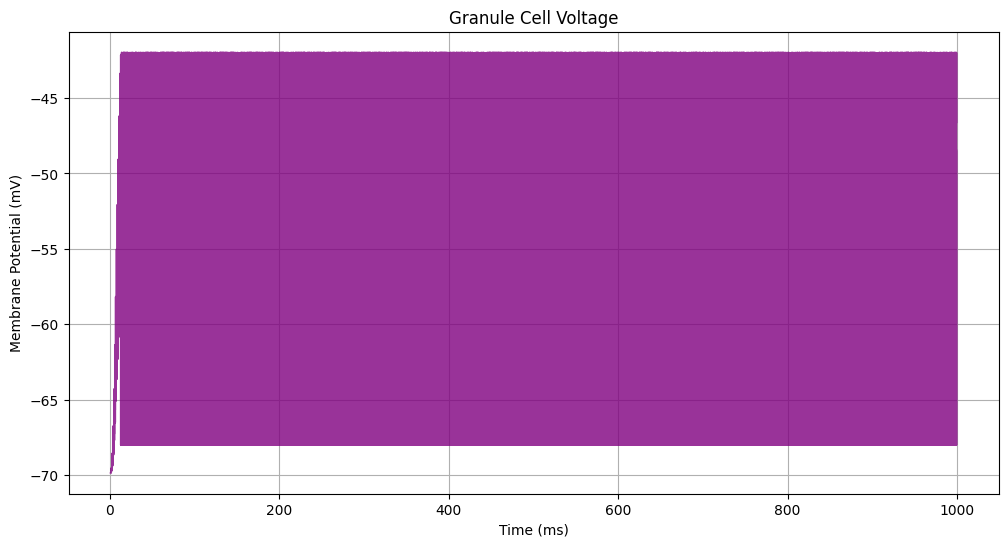

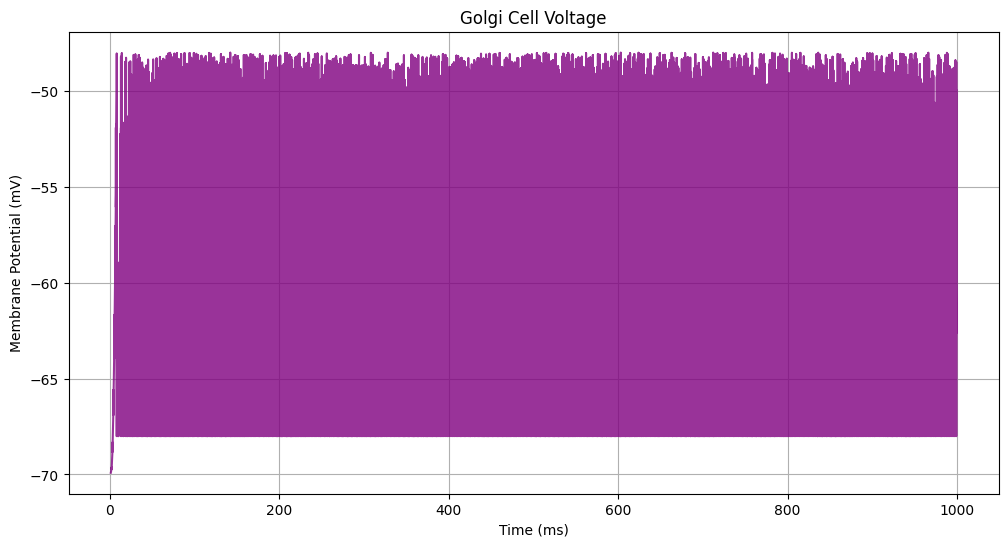

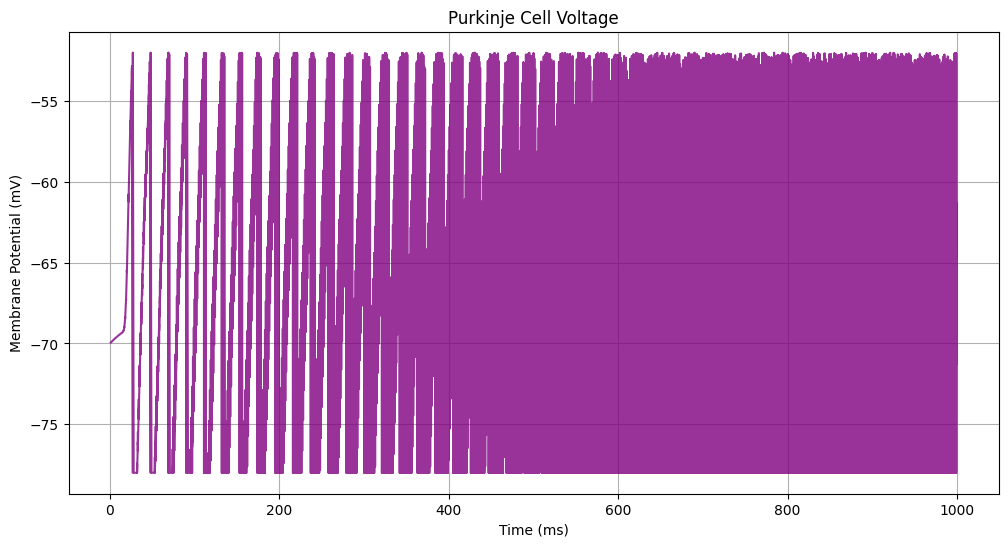

In [8]:
print("Visualization of Voltage Traces of the 3 selected Populations:\n")
visualization.plot_voltage_trace(GrC_voltage_data, title="Granule Cell Voltage")
visualization.plot_voltage_trace(GoC_voltage_data, title="Golgi Cell Voltage")
visualization.plot_voltage_trace(PC_voltage_data, title="Purkinje Cell Voltage")

**Spectral analysis** is performed on the voltage traces of Purkinje, Granule, and Golgi cells to identify dominant oscillatory frequencies. This helps assess rhythmic activity and synchronization within the network.  

For each cell type, the voltage data is analyzed, and the **power spectral density (PSD)** is plotted. If the analysis fails due to insufficient data or other issues, the script falls back to plotting the raw voltage trace instead.  


Purkinje Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 63936 samples over 998.0 ms
Calculated sampling rate: 64063.13 Hz
Total duration: 1.00 seconds
Calculated nperseg: 63935, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (63935 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 47.09 Hz
- Theta power (4-12 Hz): 6.47e-03 mV²/Hz
- Frequency range: 0.0-32031.6 Hz


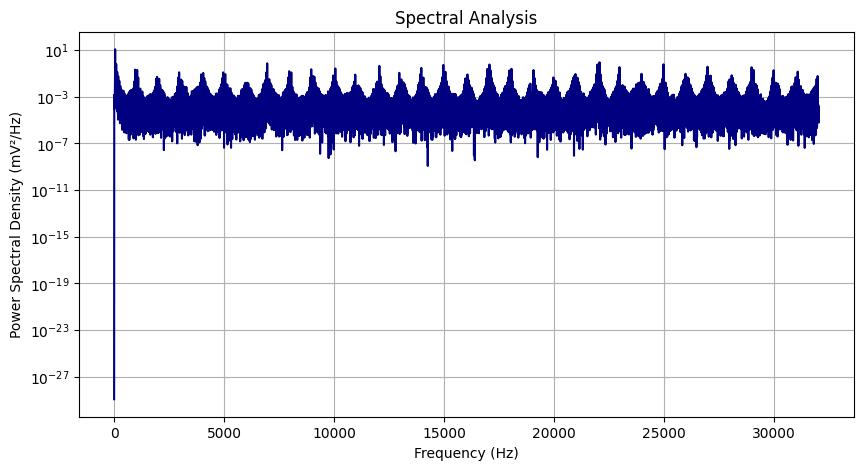


Granule Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 2497500 samples over 998.0 ms
Calculated sampling rate: 2502504.01 Hz
Total duration: 1.00 seconds
Calculated nperseg: 2497499, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (2497499 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 54.11 Hz
- Theta power (4-12 Hz): 3.85e-02 mV²/Hz
- Frequency range: 0.0-1251252.0 Hz


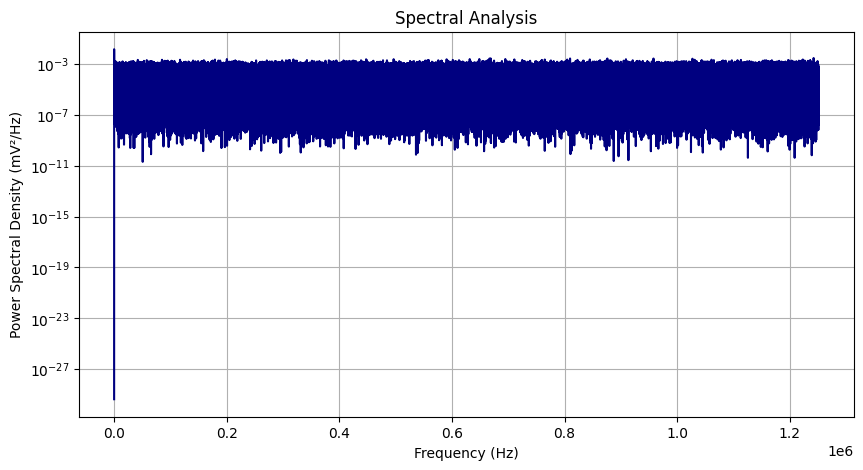


Golgi Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 29970 samples over 998.0 ms
Calculated sampling rate: 30029.06 Hz
Total duration: 1.00 seconds
Calculated nperseg: 29969, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (29969 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 12819.21 Hz
- Theta power (4-12 Hz): 3.21e-03 mV²/Hz
- Frequency range: 0.0-15014.5 Hz


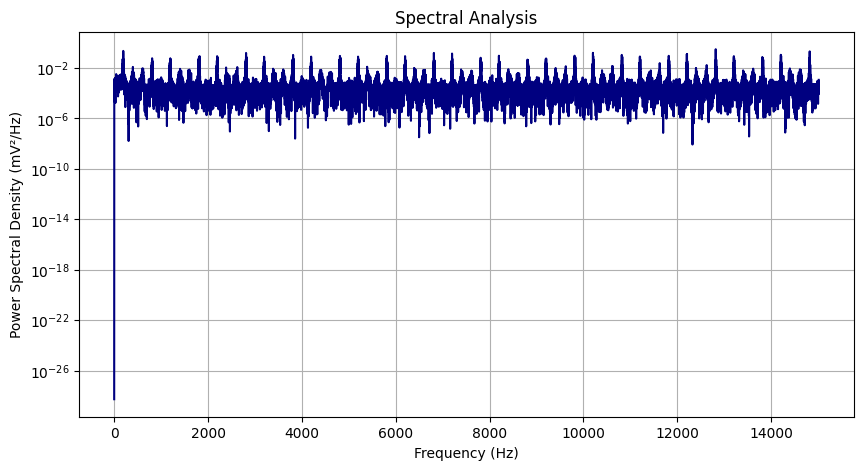

In [9]:
print("Purkinje Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(PC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(PC_voltage_data)

print("\nGranule Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GrC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e: 
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GrC_voltage_data)

print("\nGolgi Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GoC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GoC_voltage_data)



## LIF Network with Spatial Information

We now execute the spatially-integrated cerebellar model. Unlike the base LIF model, this simulation incorporates the spatial distribution of neurons, which affects connectivity and dynamics.  

Visualization Outputs include:  
1. **3D Representation of the Network**  
   It displays the spatial distribution of all neuron populations within their respective layers.  


2. **Vertical Slice (Y-Z Plane)**  
   It provides a cross-section of the network, highlighting the layering of different cell types.  

   
3. **3D Synaptic Connectivity Maps**  
   It shows how neurons connect across populations, using a color gradient to represent synaptic strength (stronger connections in darker hues). Two perspectives are provided: **lateral view** and **top-down view** to fully capture the spatial organization.  

This visualization allows for an intuitive understanding of how spatial structure influences network connectivity and firing dynamics.  

Created 2500 granule cells.
Created 64 Purkinje cells
Created 150 interneurons.
Created 30 Golgi cells.
Created 20 deep cerebellar nuclei cells.
Created 1500 mossy fibers.
Created 64 climbing fibers.
Number of mossy -> granule connections: 67307
Number of mossy -> golgi connections: 3625
Number of mossy -> DCN connections: 2346
Number of granule -> golgi connections: 320
Number of granule -> purkinje connections: 68036
Number of granule -> interneuron connections: 42009
Number of golgi -> granule connections: 5371
Number of golgi -> golgi connections: 109
Number of climbing -> purkinje connections: 64
Number of interneuron -> purkinje connections: 109
Number of interneuron -> interneuron connections: 3049
Number of purkinje -> DCN connections: 320
Network setup complete.


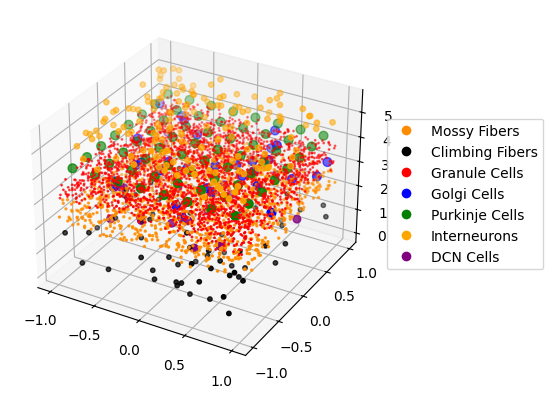

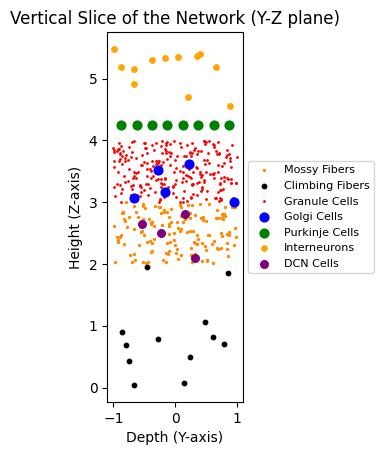

Connections from mossy_fibers to granule: 87
Connections from mossy_fibers to golgi: 3
Simulation running...
Simulation complete.


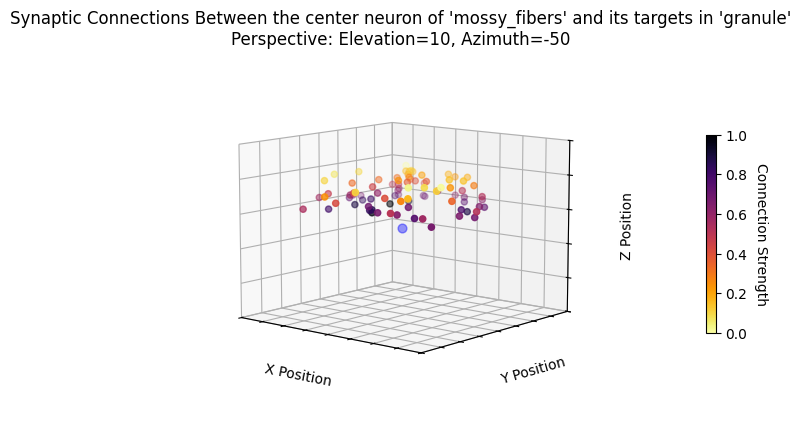

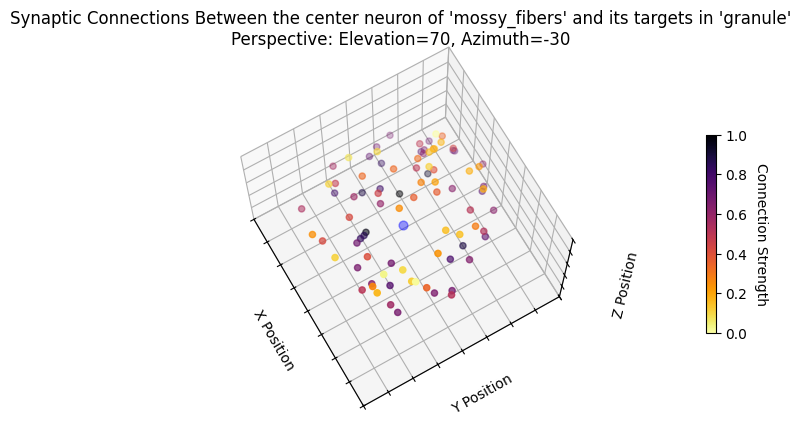

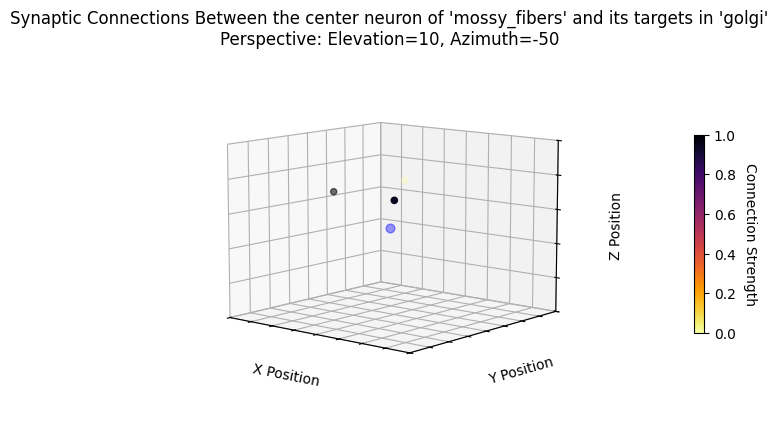

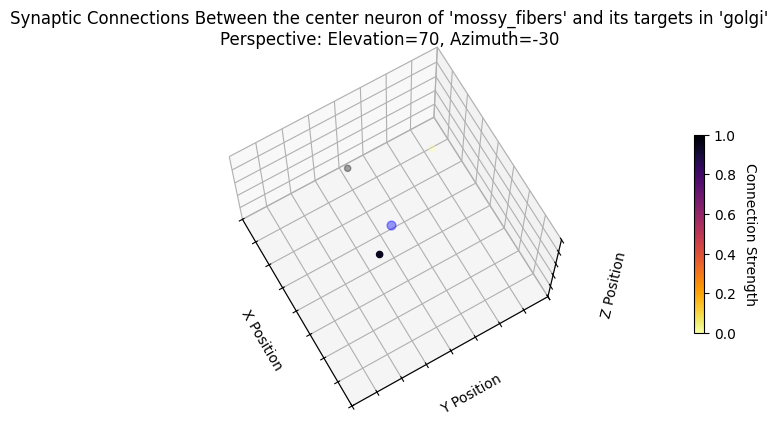

In [10]:
spatial_results = simulation.example_spatial_simulation()

The structure of the model was inspired by the following image which can be found in the "Cerebellar Modeling" lecture:

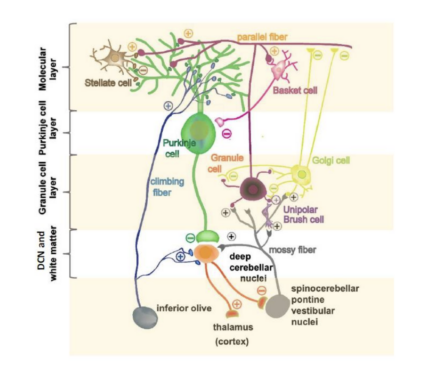

In [18]:
img = mpimg.imread("material/Cerebellar Structure.png") 
plt.imshow(img)
plt.axis("off") 
plt.show()

Spike and voltage analysis are crucial to understand how the spatially integrated model impacts the **firing dynamics** of different cerebellar cell populations.

In [12]:
## Analyze spatial results

# To make the analysis faster, we can skip the correlation analysis (~ 1hr)
skip_correlations = False

PC_spatial_spike_data = spatial_results["purkinje_spikes"]
PC_spatial_voltage_data = spatial_results["purkinje_voltages"]
GrC_spatial_spike_data = spatial_results["granule_spikes"]
GrC_spatial_voltage_data = spatial_results["granule_voltages"]
GoC_spatial_spike_data = spatial_results["golgi_spikes"]
GoC_spatial_voltage_data = spatial_results["golgi_voltages"]

PC_spatial_spike_results = analysis.analyze_spike_data(PC_spatial_spike_data, skip_correlations=skip_correlations)
GrC_spatial_spike_results = analysis.analyze_spike_data(GrC_spatial_spike_data, skip_correlations=skip_correlations)
GoC_spatial_spike_results = analysis.analyze_spike_data(GoC_spatial_spike_data, skip_correlations=skip_correlations)

PC_spatial_isis = analysis.get_isi_distribution(PC_spatial_spike_results["spike_trains"])
GrC_spatial_isis = analysis.get_isi_distribution(GrC_spatial_spike_results["spike_trains"])
GoC_spatial_isis = analysis.get_isi_distribution(GoC_spatial_spike_results["spike_trains"])

Starting spike data analysis with 1226 spikes from 57 neurons.
Created 57 spike trains.
Firing rates calculated - average: 21.53 Hz
ISI CV calculated - 56 valid values, average: 0.01
Calculating spike correlations for 57 neurons...


100%|██████████| 57/57 [00:00<00:00, 123.22it/s]


Average spike correlation: 0.02
Starting spike data analysis with 70995 spikes from 1704 neurons.
Created 1704 spike trains.
Firing rates calculated - average: 41.66 Hz
ISI CV calculated - 1652 valid values, average: 0.22
Calculating spike correlations for 1704 neurons...


100%|██████████| 1704/1704 [06:58<00:00,  4.07it/s] 


Average spike correlation: 0.05
Starting spike data analysis with 2275 spikes from 29 neurons.
Created 29 spike trains.
Firing rates calculated - average: 78.46 Hz
ISI CV calculated - 29 valid values, average: 0.04
Calculating spike correlations for 29 neurons...


100%|██████████| 29/29 [00:00<00:00, 194.71it/s]


Average spike correlation: 0.32


Again, we plot **spike trains**, **ISI distributions**, **voltage traces** and **power spectral density** for Purkinje, Granule and Golgi cell in the spatially integrated network. Differences with the base LIF network help us understand the impact of spatially organized synaptic connectivity.

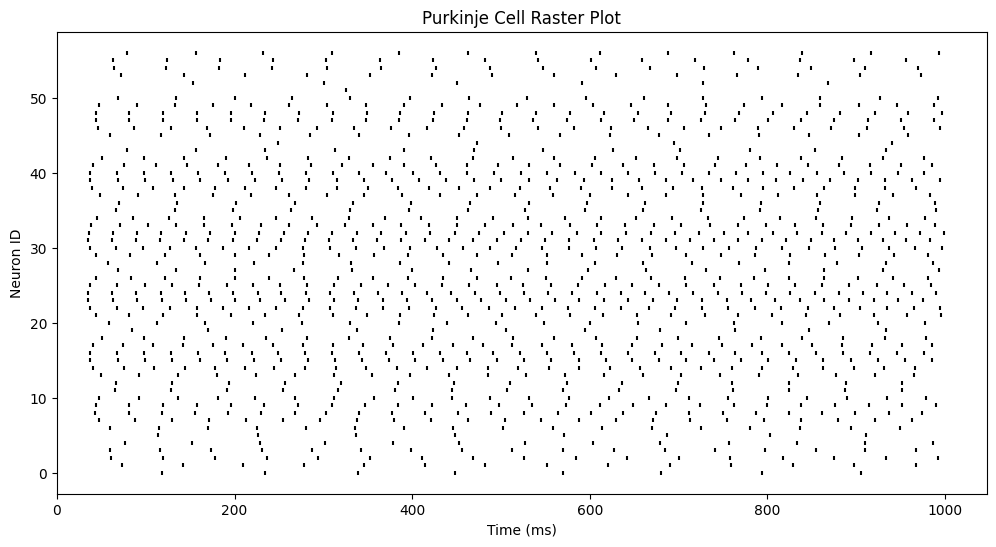

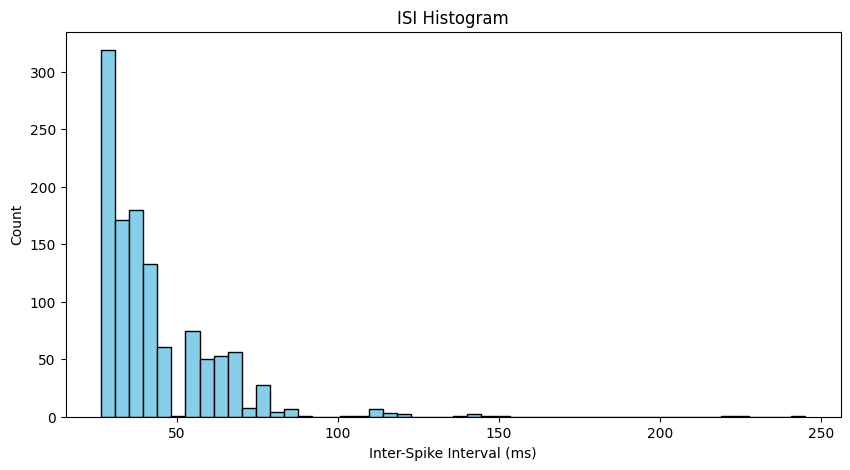

In [13]:
visualization.plot_raster(PC_spatial_spike_results, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_spatial_isis)

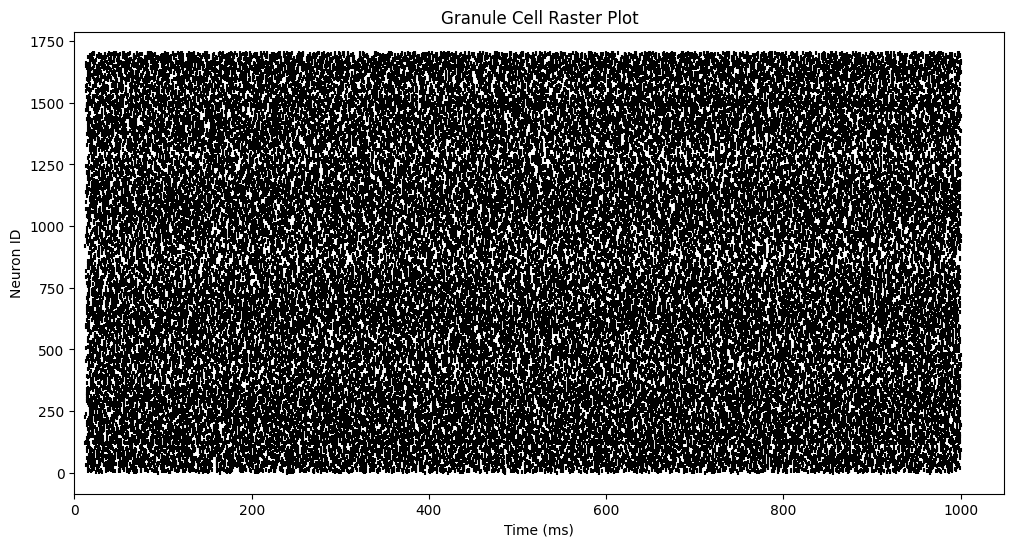

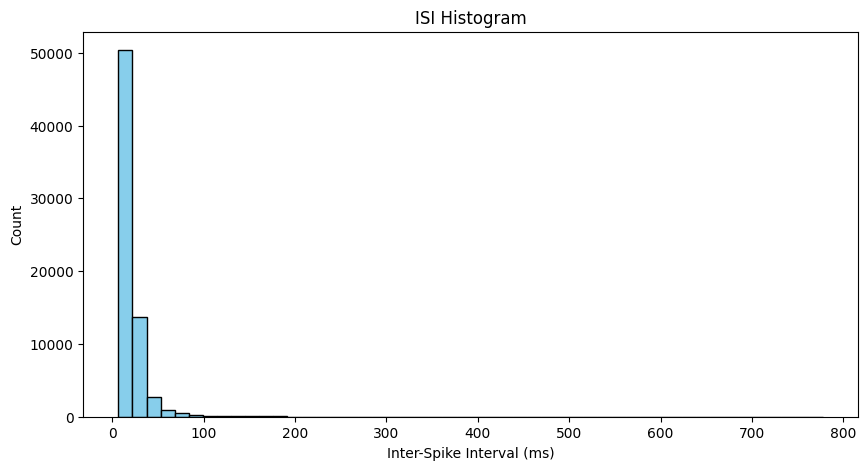

In [14]:
visualization.plot_raster(GrC_spatial_spike_results, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_spatial_isis)

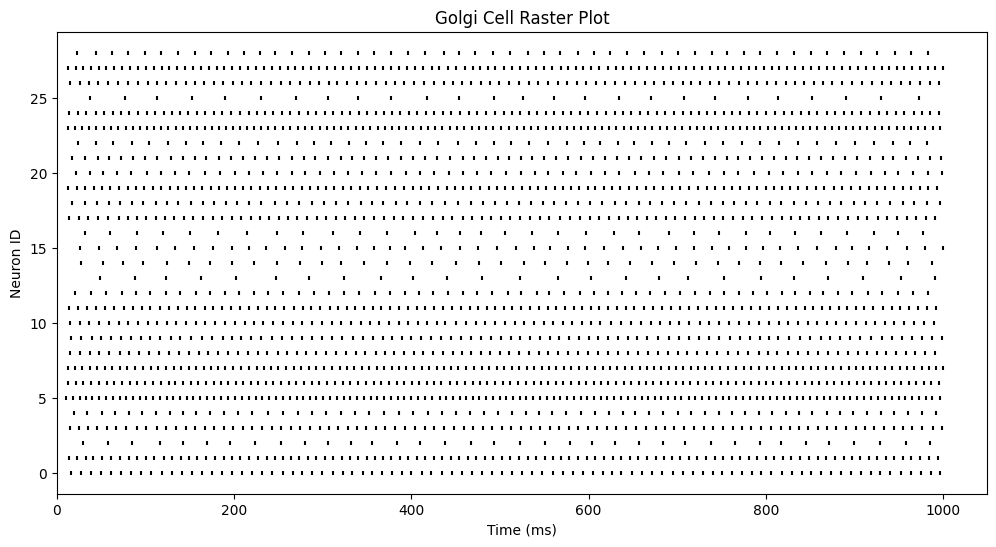

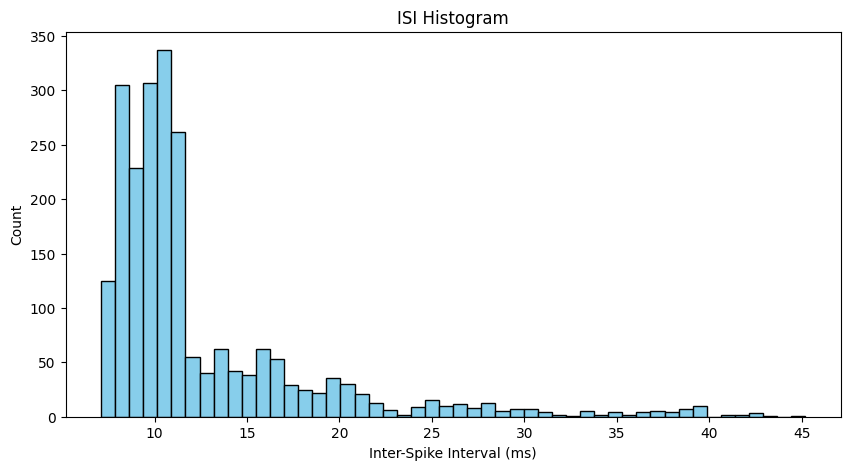

In [15]:
visualization.plot_raster(GoC_spatial_spike_results, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_spatial_isis)

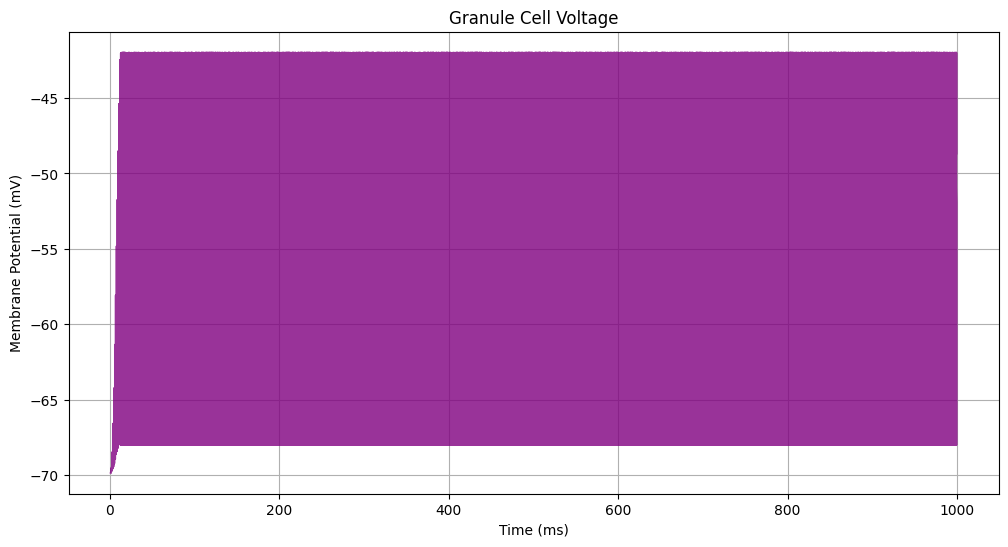

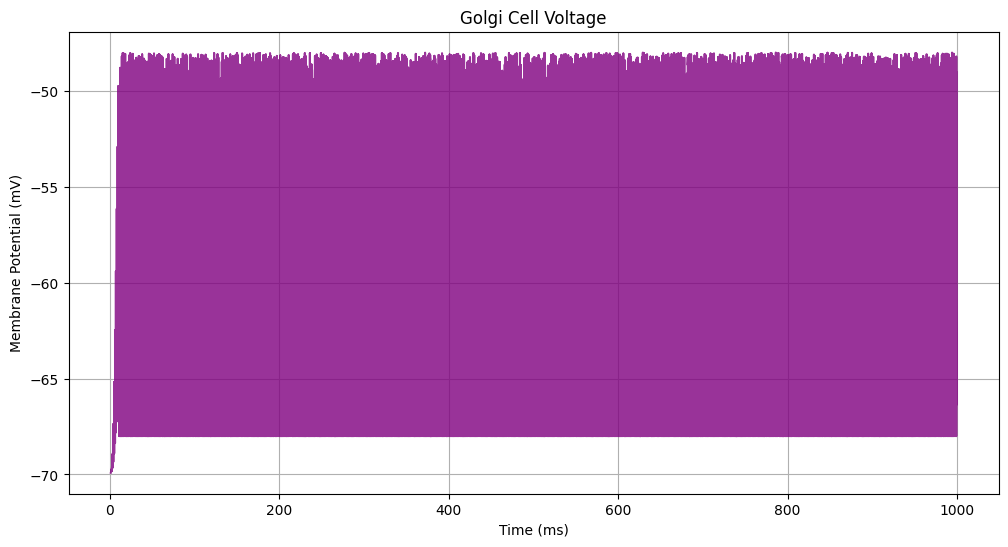

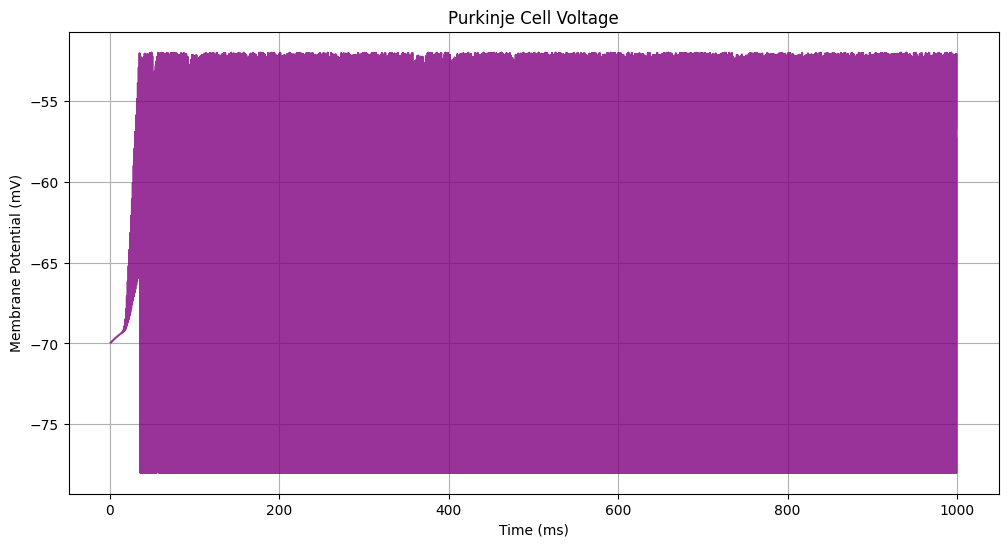

In [16]:
visualization.plot_voltage_trace(GrC_spatial_voltage_data, title="Granule Cell Voltage")
visualization.plot_voltage_trace(GoC_spatial_voltage_data, title="Golgi Cell Voltage")
visualization.plot_voltage_trace(PC_spatial_voltage_data, title="Purkinje Cell Voltage")

Purkinje Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 63936 samples over 998.0 ms
Calculated sampling rate: 64063.13 Hz
Total duration: 1.00 seconds
Calculated nperseg: 63935, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (63935 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 8007.89 Hz
- Theta power (4-12 Hz): 1.03e-01 mV²/Hz
- Frequency range: 0.0-32031.6 Hz


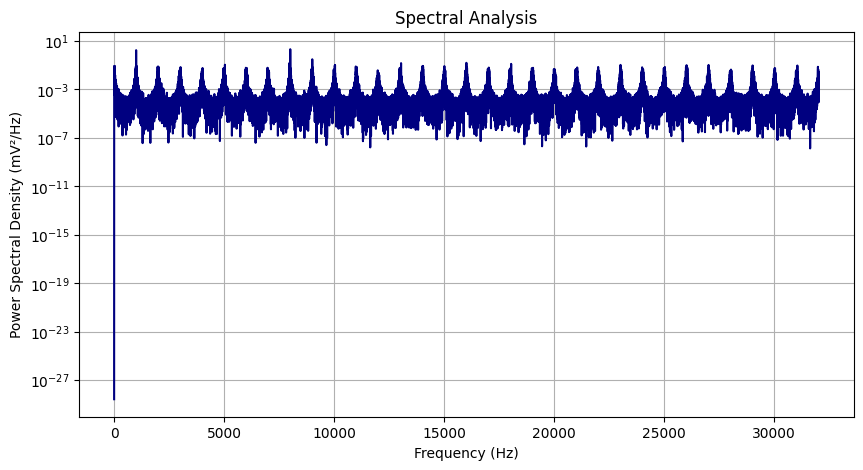


Granule Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 2497500 samples over 998.0 ms
Calculated sampling rate: 2502504.01 Hz
Total duration: 1.00 seconds
Calculated nperseg: 2497499, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (2497499 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 1.00 Hz
- Theta power (4-12 Hz): 2.26e-01 mV²/Hz
- Frequency range: 0.0-1251252.0 Hz


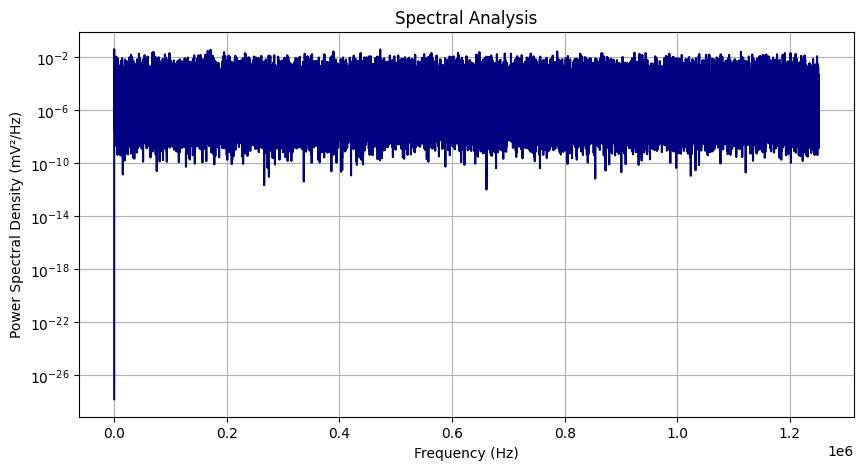


Golgi Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 29970 samples over 998.0 ms
Calculated sampling rate: 30029.06 Hz
Total duration: 1.00 seconds
Calculated nperseg: 29969, dtype: <class 'int'>
PSD parameters:
- Segment length: 1.00s (29969 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 13012.59 Hz
- Theta power (4-12 Hz): 3.06e-02 mV²/Hz
- Frequency range: 0.0-15014.5 Hz


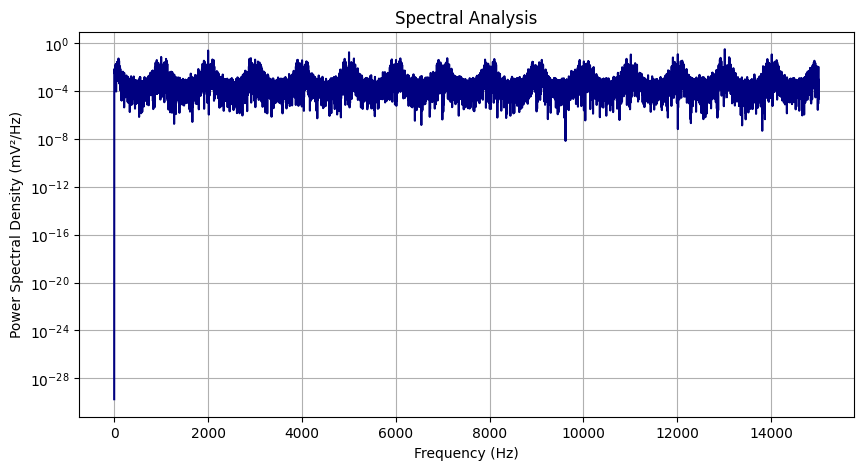

In [17]:
print("Purkinje Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(PC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(PC_spatial_voltage_data)

print("\nGranule Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GrC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e: 
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GrC_spatial_voltage_data)

print("\nGolgi Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GoC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GoC_spatial_voltage_data)

Visualization techniques such as raster plots, ISI histograms, and spectral analysis help reveal important insights into how network connectivity and spatial arrangements affect neuronal behavior.

By comparing the base and spatial models, we are better positioned to understand the role of spatial organization in cerebellar processing and its potential implications for computational neuroscience. Further refinements and additional analyses, such as cross-correlation studies and deeper spectral analyses, could provide even more detailed insights into the network's function.